# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
RANDOM_STATE = 42

In [2]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/22s_msai/homeworks/Lab1_ML_pipeline_and_SVM/car_data.csv

--2022-05-12 07:30:21--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/22s_msai/homeworks/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2022-05-12 07:30:21 (5.03 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=RANDOM_STATE)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,375,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,840,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,357,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


Methods `describe` and `info` deliver some useful information.

In [5]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.723133,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,242.288797,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,430.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [6]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


In [7]:
pd.DataFrame(y_train).value_counts()

opel    152
saab    133
bus     132
van     132
dtype: int64

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [8]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_pd = pd.DataFrame(scaler.fit_transform(X_train))
X_test_pd = pd.DataFrame(scaler.transform(X_test))
# I use standard scaling here as there's neither assumptions regarding the 
# distributions of the given features (for simplicity), nor the domain 
# knowledge of the data.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [9]:
### YOUR CODE HERE
# 1. Find optimal hyperparameters for logistic regression with cross-validation 
# on the train data (small grid/random search is enough, no need to find the 
# best parameters).
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
import warnings

warnings.filterwarnings("ignore")

def scores(y_true, y_pred):
  print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
  # Although classes are balanced, I'll keep micro and macro averaging out of curiosity
  f1_micro = f1_score(y_true, y_pred, average="micro")
  print(f"F1-score (micro): {f1_micro}")  
  f1_macro = f1_score(y_true, y_pred, average="macro")
  print(f"F1-score (macro): {f1_macro}")


n_folds = 4
logreg = LogisticRegression(multi_class='multinomial', solver='saga',
                            tol=1e-3, max_iter=500, random_state=RANDOM_STATE)
print("Cross-val score for the given params:")
cvs = cross_val_score(logreg, X_train_pd, y_train, cv=n_folds)
print(f"Scores: {cvs}, Average: {np.mean(cvs)}")
logreg.fit(X_train_pd, y_train)
print("\nValidation:")
y_test_pred = logreg.predict(scaler.transform(X_test))
scores(y_test, y_test_pred)

print("\nCross-val score after the grid search:")
parameters = {
    "C": np.logspace(-3,3,7), 
    'solver': ['newton-cg', 'saga', 'lbfgs'], 
    "penalty": ["l1","l2"]
}
clf = GridSearchCV(LogisticRegression(random_state=RANDOM_STATE), parameters, cv=n_folds, n_jobs=-1)
clf.fit(X_train_pd, y_train)
print("tuned hpyerparameters (best parameters):", clf.best_params_)
print("accuracy :", clf.best_score_)

# 2. Estimate the model quality with f1 and accuracy scores.
print("\nValidation (GridSearch):")
y_test_pred = clf.predict(scaler.transform(X_test))
scores(y_test, y_test_pred)

Cross-val score for the given params:
Scores: [0.77536232 0.78832117 0.81021898 0.74452555], Average: 0.7796070030678093

Validation:
Accuracy: 0.8013468013468014
F1-score (micro): 0.8013468013468014
F1-score (macro): 0.7939494434942103

Cross-val score after the grid search:
tuned hpyerparameters (best parameters): {'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7978022849888925

Validation (GridSearch):
Accuracy: 0.8114478114478114
F1-score (micro): 0.8114478114478115
F1-score (macro): 0.8028619686358605
CPU times: user 1 s, sys: 64 ms, total: 1.07 s
Wall time: 8.53 s


In [10]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt


def plot_curve(y_pred_proba, y_true):
  n_classes = y_true.shape[1]

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_proba[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure()
  plt.plot(
      fpr["micro"],
      tpr["micro"],
      label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
      color="deeppink",
      linestyle=":",
      linewidth=4,
  )

  plt.plot(
      fpr["macro"],
      tpr["macro"],
      label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
      color="navy",
      linestyle=":",
      linewidth=4,
  )

  lw = 2
  colors = cycle(["red", "aqua", "darkorange", "cornflowerblue"])
  for i, color in zip(range(n_classes), colors):
      plt.plot(
          fpr[i],
          tpr[i],
          color=color,
          lw=lw,
          label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
      )

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Some extension of Receiver operating characteristic to multiclass")
  plt.legend(loc="lower right")
  plt.show()

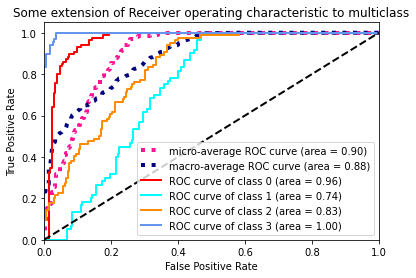

In [11]:
y_pred_score = clf.decision_function(scaler.transform(X_test))
y_test_score = pd.get_dummies(y_test).to_numpy()

plot_curve(y_pred_score, y_test_score)

In [12]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

!pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [13]:
### YOUR CODE HERE
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_train_pca = pca.fit_transform(X_train_pd)
fig = px.scatter(X_train_pca, x=0, y=1, color=y_train)
fig.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

**Should you normalize the data?**

Yes, we must normalize our data before making PCA as this analysis is based on the variance of the initial variables. Features of different scales will get different PCA score based on this. Thus, in order to have a "fair" PCA estimation we need to normalize the data by variance, so all of them have the same standard deviation.

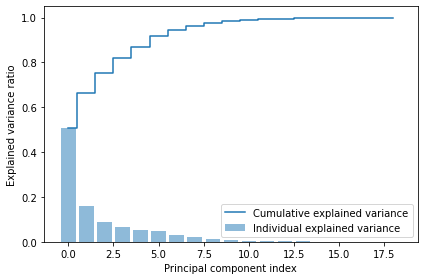

In [14]:
### YOUR CODE HERE

pca = PCA()
# Determine transformed features
X_train_pca = pca.fit_transform(X_train_pd)
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [15]:
n_pca = len(cum_sum_eigenvalues[cum_sum_eigenvalues < 0.99])
print(f"The number of prcincipal components that explain at least 99% of variance: {n_pca}")

The number of prcincipal components that explain at least 99% of variance: 11


In [16]:
pca = PCA(n_components=11, random_state=RANDOM_STATE)
X_train_pca = pca.fit_transform(X_train_pd)
X_test_pca = pca.transform(scaler.transform(X_test))

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [17]:
### YOUR CODE HERE
%%time

print("\nCross-val score after the grid search:")
parameters = {
    "C": np.logspace(-3,3,7), 
    'solver': ['newton-cg', 'saga', 'lbfgs'], 
    "penalty": ["l1","l2"]
}
clf = GridSearchCV(LogisticRegression(random_state=RANDOM_STATE), parameters, cv=n_folds, n_jobs=-1)
clf.fit(X_train_pca, y_train)
print("tuned hpyerparameters(best parameters):", clf.best_params_)
print("accuracy :", clf.best_score_)

# 2. Estimate the model quality with f1 and accuracy scores.
print("\nValidation (GridSearch):")
y_test_pred = clf.predict(X_test_pca)
scores(y_test, y_test_pred)


Cross-val score after the grid search:
tuned hpyerparameters(best parameters): {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.7249814873585105

Validation (GridSearch):
Accuracy: 0.7272727272727273
F1-score (micro): 0.7272727272727273
F1-score (macro): 0.7143266021759247
CPU times: user 382 ms, sys: 21.5 ms, total: 404 ms
Wall time: 3.64 s


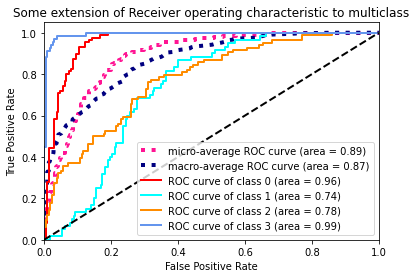

In [18]:
y_pred_score = clf.decision_function(X_test_pca)
y_test_score = pd.get_dummies(y_test).to_numpy()

plot_curve(y_pred_score, y_test_score)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [19]:
%%time
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

print("\nCross-val score after the grid search:")
parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth": [i+1 for i in range(7)] + [None],
    "min_samples_split": [i**2+2 for i in range(4)],
    "min_samples_leaf": [i**2+1 for i in range(4)],
    "max_features": ["auto", "sqrt", "log2"],
    "class_weight": [None, "balanced"]
}
clf = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE), parameters, cv=n_folds, n_jobs=-1)
clf.fit(X_train, y_train)
print("tuned hpyerparameters(best parameters) :", clf.best_params_)
print("accuracy :", clf.best_score_)

# 2. Estimate the model quality with f1 and accuracy scores.
print("\nValidation (GridSearch):")
y_test_pred = clf.predict(X_test)
scores(y_test, y_test_pred)


Cross-val score after the grid search:
tuned hpyerparameters(best parameters) : {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2}
accuracy : 0.6812123135512536

Validation (GridSearch):
Accuracy: 0.6498316498316499
F1-score (micro): 0.6498316498316499
F1-score (macro): 0.6470436598210725
CPU times: user 5.39 s, sys: 107 ms, total: 5.5 s
Wall time: 31.9 s


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [20]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier
from tqdm import tqdm


N = [2] + [5*i for i in range(1, 105//5)]

def run_bagging(X_train, y_train, X_test, y_test, model, n_estimators=[1]):
  scores = {
      "f1": [],
      "acc": []
  }
  for n in tqdm(n_estimators):
    clf = BaggingClassifier(base_estimator=model, n_estimators=n, 
                            bootstrap=True, bootstrap_features=False, 
                            random_state=RANDOM_STATE, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores['f1'].append(f1_score(y_test, y_pred, average="macro"))
    scores['acc'].append(accuracy_score(y_test, y_pred))
  return scores

In [21]:
# LOGISTIC REGRESSION
%%time
logreg = LogisticRegression(C=100.0, penalty='l2', solver='lbfgs',random_state=RANDOM_STATE)
sc_logreg = run_bagging(X_train_pd, y_train, X_test_pd, y_test, logreg, n_estimators=N)

100%|██████████| 21/21 [00:59<00:00,  2.84s/it]

CPU times: user 1.58 s, sys: 109 ms, total: 1.69 s
Wall time: 59.6 s


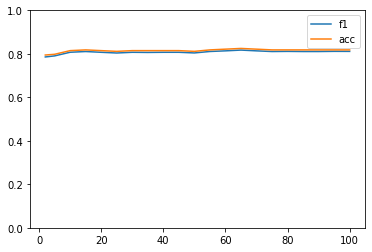

In [22]:
plt.plot(N, sc_logreg["f1"])
plt.plot(N, sc_logreg["acc"])
plt.ylim(0,1)
plt.legend(["f1", "acc"])
plt.show();

In [23]:
# DECISION TREES
%%time
dt = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', 
                            max_depth=None, max_features='auto', min_samples_leaf=10, 
                            min_samples_split=2,random_state=RANDOM_STATE)
sc_dt = run_bagging(X_train_pd, y_train, X_test_pd, y_test, dt, n_estimators=N)

100%|██████████| 21/21 [00:04<00:00,  4.84it/s]

CPU times: user 1.27 s, sys: 58.5 ms, total: 1.32 s
Wall time: 4.35 s


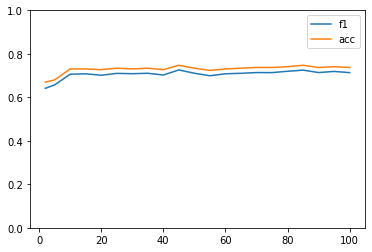

In [24]:
plt.plot(N, sc_dt["f1"])
plt.plot(N, sc_dt["acc"])
plt.legend(["f1", "acc"])
plt.ylim(0,1)
plt.show();

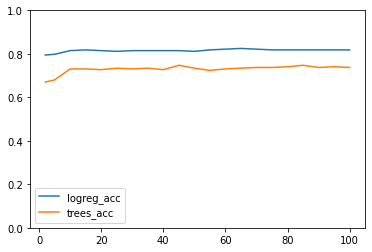

In [25]:
# COMPARISON
plt.plot(N, sc_logreg["acc"])
plt.plot(N, sc_dt["acc"])
plt.legend(["logreg_acc", "trees_acc"])
plt.ylim(0,1)
plt.show();

In [26]:
nn = N[np.argmax(sc_logreg["acc"])]
nm = round(max(sc_logreg["acc"]),2)
print(f"Logistic regression max accuracy, N={nn}, acc={nm}")
nn = N[np.argmax(sc_dt["acc"])]
nm = round(max(sc_dt["acc"]),2)
print(f"Decision trees max accuracy, N={nn}, acc={nm}")

Logistic regression max accuracy, N=65, acc=0.82
Decision trees max accuracy, N=45, acc=0.75


**Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.**

Logistic regression max accuracy, N=65, acc=0.82

Decision trees max accuracy, N=45, acc=0.75

in case of Logistic Regression we had 65 estimators to be the best ensemble, but overall the number of estimators didn't make much influence on accuracy (most of the time scores were near a constant value and we can roughly consider 65 to be fluctuation of the data).

In case of Decision trees, max accuracy was achieved with 45 trees. However, the dependence of accuracy from the number of trees was much higher (especially for the N_estimators<20) compared to the case of Logistic Regression.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [27]:
%%time
from sklearn.ensemble import RandomForestClassifier

N = [2] + [5*i for i in range(1, 105//5)]

n_estimators=N
sc_rf = {
  "f1": [],
  "acc": []
}
for n in tqdm(n_estimators):
  rf = RandomForestClassifier(n_estimators=n, random_state=RANDOM_STATE, n_jobs=-1)
  rf.fit(X_train_pd, y_train)
  y_pred = rf.predict(X_test_pd)
  sc_rf['f1'].append(f1_score(y_test, y_pred, average="macro"))
  sc_rf['acc'].append(accuracy_score(y_test, y_pred))

100%|██████████| 21/21 [00:06<00:00,  3.21it/s]

CPU times: user 4.16 s, sys: 474 ms, total: 4.64 s
Wall time: 6.56 s


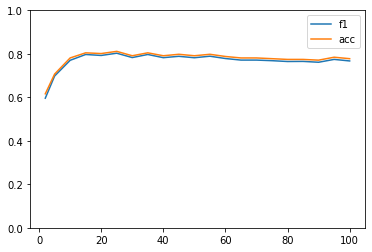

In [28]:
plt.plot(N, sc_rf["f1"])
plt.plot(N, sc_rf["acc"])
plt.ylim(0,1)
plt.legend(["f1", "acc"])
plt.show();

In [29]:
nn = N[np.argmax(sc_rf["acc"])]
nm = round(max(sc_rf["acc"]),2)
print(f"Random Forest max accuracy, N={nn}, acc={nm}")

Random Forest max accuracy, N=25, acc=0.81


**What is the optimal number of trees you've got?**

25

**Is it different from the optimal number of logistic regressions/decision trees in 2.6?** 

Yes, in case of Logistic Regression we had 65 estimators to be the best ensemble, but overall the number of estimators didn't make much influence on accuracy.

In case of Decision trees, max accuracy was achieved with 45 trees. However, the dependence of accuracy from the number of trees was much higher compared to the case with Logistic Regression.

**Explain the results briefly.**

Random Forest showed the highest scores with the number of estimators equal to 25. It shows that it takes less estimators for the algorithm to achieve the highest scores because of the diversity of embedded weak classifiers (all of them are trained on different subset of features).

**What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.**

* The optimal number of trees from the block 2.6. is **45**

* The optimal number of trees of random forest is **55**.

The values are quite close to each other. The difference can be explained with different set of hyperparams of trees in case of bagging from 2.6. and in case of random forest. Also, the algorithms (bagging and random forest) are slightly different. These two reasons can describe the difference between the optimal number of trees.

#### 2.8. Gradient boosting
Now select the gradient boosting framework you prefer (LightGBM, XGBoost, CatBoost) and repeat the same experiments.

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal size of the you've got? Explain the results briefly.

In [30]:
%%time
from xgboost import XGBClassifier

N = [2] + [5*i for i in range(1, 105//5)]

n_estimators=N
sc_xgb = {
  "f1": [],
  "acc": []
}
for n in tqdm(n_estimators):
  xgb = XGBClassifier(n_estimators=n, random_state=RANDOM_STATE, n_jobs=-1)
  xgb.fit(X_train_pd, y_train)
  y_pred = xgb.predict(X_test_pd)
  sc_xgb['f1'].append(f1_score(y_test, y_pred, average="macro"))
  sc_xgb['acc'].append(accuracy_score(y_test, y_pred))

100%|██████████| 21/21 [00:02<00:00,  8.12it/s]

CPU times: user 4.59 s, sys: 93.2 ms, total: 4.68 s
Wall time: 2.68 s


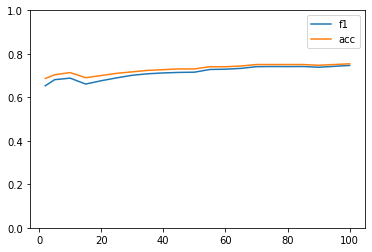

In [31]:
plt.plot(N, sc_xgb["f1"])
plt.plot(N, sc_xgb["acc"])
plt.ylim(0,1)
plt.legend(["f1", "acc"])
plt.show();

In [32]:
nn = N[np.argmax(sc_xgb["acc"])]
nm = round(max(sc_xgb["acc"]),2)
print(f"Gradient Boosting max accuracy, N={nn}, acc={nm}")

Gradient Boosting max accuracy, N=100, acc=0.75


**What is the optimal size of the you've got? Explain the results briefly.**

The optimal number of trees is 100. It's reasonable, that the Gradient Boosting model benifits from the higher number of estimators as any consequent estimator resolves the errors made by the previous one. It means that the higher number of estimators, the higher is accuracy.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [33]:
training_data_splits = []
l = len(X_train_pd)
N = []
for i in range(1, 10):
  idx = l//10*i
  N.append(idx)
  training_data_splits.append((X_train_pd[:idx], y_train[:idx]))
training_data_splits.append((X_train_pd, y_train))
N.append(l)

In [34]:
def run_on_splits(training_data_splits, X_test, y_test, model):
  sc = {
    "f1": [],
    "acc": []
  }
  for X_train, y_train in tqdm(training_data_splits):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    sc['f1'].append(f1_score(y_test, y_pred, average="macro"))
    sc['acc'].append(accuracy_score(y_test, y_pred))
  return sc

In [35]:
%%time
logreg = LogisticRegression(C=100.0, penalty='l2', solver='lbfgs', random_state=RANDOM_STATE)

sc_logreg1 = run_on_splits(training_data_splits, X_test_pd, y_test, logreg)

100%|██████████| 10/10 [00:00<00:00, 19.44it/s]

CPU times: user 504 ms, sys: 16 ms, total: 519 ms
Wall time: 522 ms


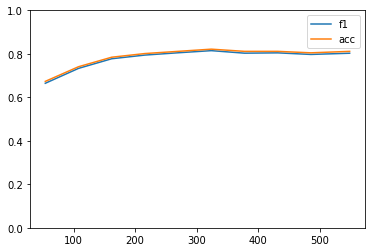

In [36]:
plt.plot(N, sc_logreg1["f1"])
plt.plot(N, sc_logreg1["acc"])
plt.ylim(0,1)
plt.legend(["f1", "acc"])
plt.show();

In [37]:
%%time
dt = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', 
                            max_depth=None, max_features='auto', min_samples_leaf=10, 
                            min_samples_split=2,random_state=RANDOM_STATE)

sc_dt1 = run_on_splits(training_data_splits, X_test_pd, y_test, dt)

100%|██████████| 10/10 [00:00<00:00, 137.67it/s]

CPU times: user 76.7 ms, sys: 1.99 ms, total: 78.6 ms
Wall time: 79.1 ms


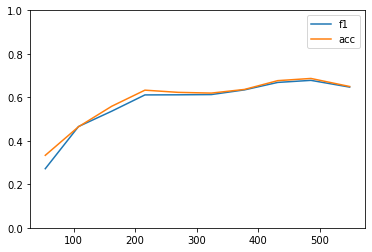

In [38]:
plt.plot(N, sc_dt1["f1"])
plt.plot(N, sc_dt1["acc"])
plt.ylim(0,1)
plt.legend(["f1", "acc"])
plt.show();

In [39]:
%%time
rf = RandomForestClassifier(n_estimators=25, random_state=RANDOM_STATE, n_jobs=-1)

sc_rf1 = run_on_splits(training_data_splits, X_test_pd, y_test, rf)

100%|██████████| 10/10 [00:02<00:00,  4.35it/s]

CPU times: user 952 ms, sys: 107 ms, total: 1.06 s
Wall time: 2.3 s


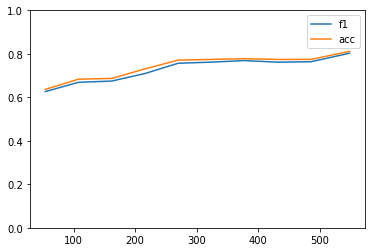

In [40]:
plt.plot(N, sc_rf1["f1"])
plt.plot(N, sc_rf1["acc"])
plt.ylim(0,1)
plt.legend(["f1", "acc"])
plt.show();

In [41]:
%%time
xgb = XGBClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1)

sc_xgb1 = run_on_splits(training_data_splits, X_test_pd, y_test, xgb)

100%|██████████| 10/10 [00:01<00:00,  6.98it/s]

CPU times: user 2.64 s, sys: 59.2 ms, total: 2.7 s
Wall time: 1.45 s


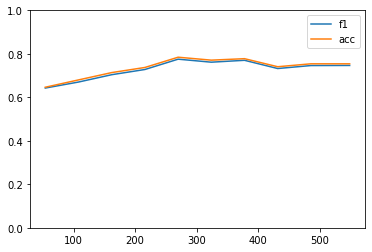

In [42]:
plt.plot(N, sc_xgb1["f1"])
plt.plot(N, sc_xgb1["acc"])
plt.ylim(0,1)
plt.legend(["f1", "acc"])
plt.show();

The comparison of the learning curves of the algorithms.

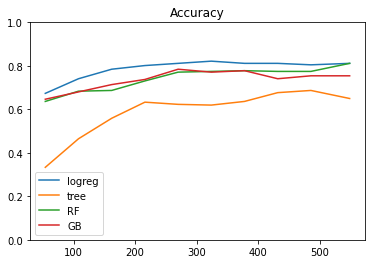

In [44]:
plt.plot(N, sc_logreg1["acc"])
plt.plot(N, sc_dt1["acc"])
plt.plot(N, sc_rf1["acc"])
plt.plot(N, sc_xgb1["acc"])
plt.ylim(0,1)
plt.legend(["logreg", "tree", "RF", "GB"])
plt.title("Accuracy")
plt.show();

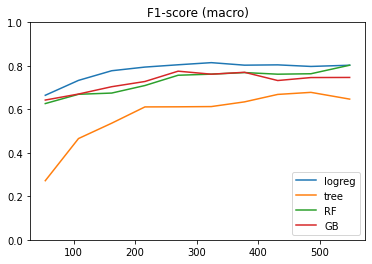

In [45]:
plt.plot(N, sc_logreg1["f1"])
plt.plot(N, sc_dt1["f1"])
plt.plot(N, sc_rf1["f1"])
plt.plot(N, sc_xgb1["f1"])
plt.ylim(0,1)
plt.legend(["logreg", "tree", "RF", "GB"])
plt.title("F1-score (macro)")
plt.show();

**Analyse the final plot. Can you make any conlusions using it?**

It can be clearly seen that the Decision Tree algorithm has a high dependence from the size of the dataset. Logistic regression, on the other hand, has the least level of dependence from the size of the given dataset. Random Forest and Gradient Boosting both moderetly benefit from the increase of the dataset.